In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [3]:
# check if any null value is present
df.isnull().values.any()

False

## Changing the diabetes clumn from boolean to number values

In [4]:
diabetes_map = {True: 1, False: 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [5]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600,1.000000


In [6]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

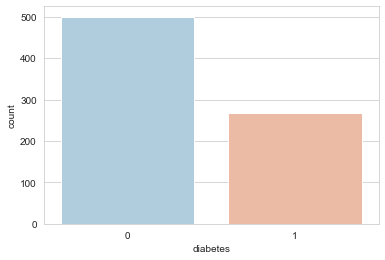

In [7]:
#To check using a counter plot
sns.set_style('whitegrid')
sns.countplot(x='diabetes', data = df, palette='RdBu_r')

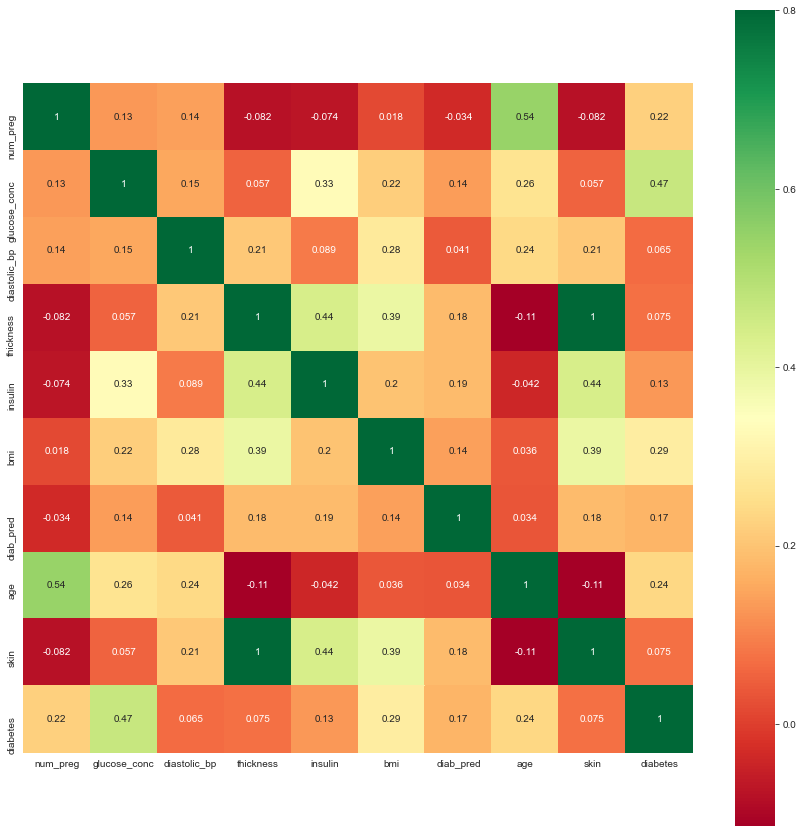

In [8]:
# Correlation between each Attribute

corrmat = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrmat, vmax=0.8, annot=True, cmap='RdYlGn', square=True)
plt.show()

C:\Users\Nimish\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Nimish\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Nimish\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Nimish\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecatio

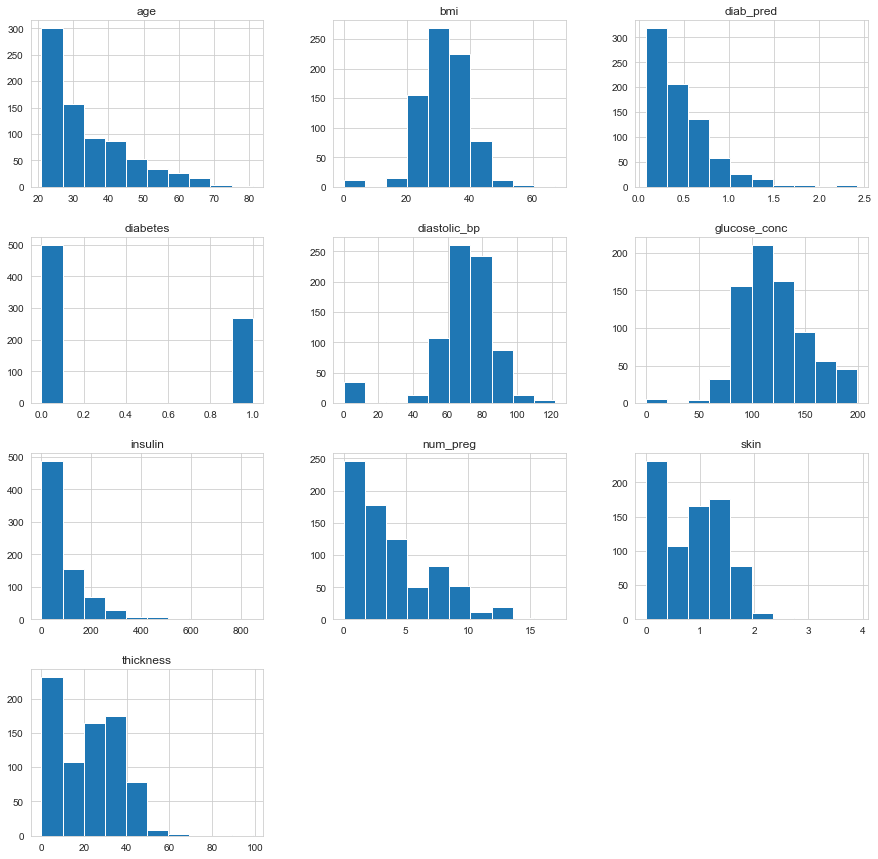

In [9]:
df.hist(figsize=(15,15))
plt.show()

In [10]:
columns = df.columns.tolist()

In [11]:
print(columns)

['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age', 'skin', 'diabetes']


In [12]:
y = df['diabetes']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

In [13]:
X = df.drop(['diabetes'], axis=1)
X[:5]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148,72,35,0,33.6,0.627,50,1.3790
1,1,85,66,29,0,26.6,0.351,31,1.1426
2,8,183,64,0,0,23.3,0.672,32,0.0000
3,1,89,66,23,94,28.1,0.167,21,0.9062
4,0,137,40,35,168,43.1,2.288,33,1.3790


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

## How many missig zero values

In [15]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("number of rows missing skin: {0}".format(len(df.loc[df['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing skin: 227


As many entries are zero, therefore filling them with "mean" values

In [16]:
from sklearn.preprocessing import Imputer


fill_values = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

C:\Users\Nimish\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## KNN Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [18]:
knn_score=[]
for n in range(1,21):
    KNN = KNeighborsClassifier(n_neighbors=n)
    score = cross_val_score(KNN, X_train, y_train, cv=10)
    knn_score.append(score.mean())

In [19]:
knn_score

[0.6757251762912141,
 0.6909529254812273,
 0.7071443999745887,
 0.6963026491328377,
 0.7094777968362873,
 0.7097509688075726,
 0.7227190140397688,
 0.7283444507972809,
 0.7245708658916207,
 0.7358217394066451,
 0.731910933231688,
 0.7320506956356013,
 0.743164347881329,
 0.7357207293056349,
 0.7374004192872118,
 0.7488234546725113,
 0.7469029921860111,
 0.7616193380344325,
 0.7487211740041928,
 0.7485515532685343]

Text(0, 0.5, 'Score')

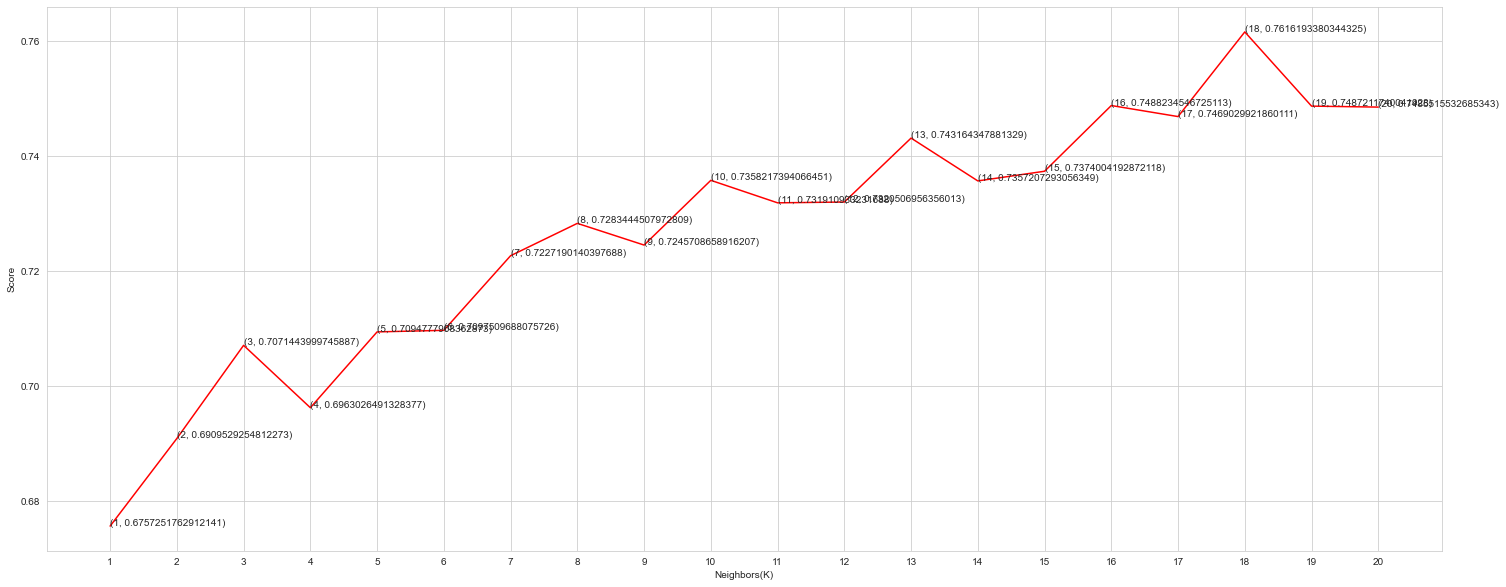

In [20]:
#Determining best value of K using a  graphical plot
plt.figure(figsize=(25,10))
plt.plot([k for k in range(1,21)], knn_score, color="red")
for i in range(1,21):
    plt.text(i, knn_score[i-1], (i, knn_score[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Neighbors(K)')
plt.ylabel('Score')

In [21]:
#Finding the value of K corresponding to the maximum accuracy
max=0
for i in range(19):
    if knn_score[max] < knn_score[i]:
        max = i
print(max+1)

18


In [22]:
KNN = KNeighborsClassifier(n_neighbors=17)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [23]:
y_pred = KNN.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[132  14]
 [ 35  50]]
0.7878787878787878


## Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=14)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=14,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
y_pred_ = RFC.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_))
print(accuracy_score(y_test, y_pred_))

[[128  18]
 [ 33  52]]
0.7792207792207793


## Using XGBoost Classifier

In [28]:
## Hyper Parameter Optimization

parameters= {
    'learning_rate'    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
    'max_depth'        : [3, 4, 5, 6, 8, 10, 12, 15] , 
    'min_child_weight' : [1, 3, 5, 7] ,
    'gamma'            : [0.0, 0.1, 0.2, 0.3, 0.4] ,
    'colsample_bytree' : [0.3, 0.4, 0.5, 0.7]
}

In [29]:
## Hyperparameter optimizing using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [30]:
classifier = xgboost.XGBClassifier()

In [31]:
clf = RandomizedSearchCV(classifier,param_distributions=parameters,n_iter=5, scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [32]:
# Fitting data to know the best parameters

clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    6.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distribu

In [33]:
print(clf.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [34]:
print(clf.best_params_)

{'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.5}


In [35]:
model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [36]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [37]:
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[133  13]
 [ 33  52]]
0.8008658008658008
